In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data_mut = pd.read_csv('./mut.csv', sep = ',')
data_no_mut = pd.read_csv('./nomut.csv', sep = ',')

In [3]:
data_no_mut

,Gene name,Mutated samples,Samples tested
0,BAP1_ENST00000615113,0,1177
1,SF3B1_ENST00000409915,0,1152
2,SF3B1_ENST00000414963,0,1152
3,SF3B1_ENST00000487698,0,1152
4,MYC_ENST00000641252,0,1144
...,...,...,...
2414,TP53TG3F,0,1012
2415,CWC25,0,1012
2416,NUDT4B,0,1012
2417,OR4F21,0,1012


In [4]:
data_mut

,Gene name,Mutated samples,Samples tested
0,TP53,1336,4486
1,TP53_ENST00000445888,1209,4486
2,TP53_ENST00000622645,1209,4486
3,TP53_ENST00000455263,1209,4486
4,TP53_ENST00000617185,1209,4486
...,...,...,...
54050,BEX2_ENST00000372677,1,1012
54051,PTPRCAP,1,1013
54052,RAD52_ENST00000545564,1,1097
54053,FAM9C_ENST00000380625,1,1013


In [5]:
data_all = pd.concat([data_mut, data_no_mut], axis = 0)

In [6]:
data_all['Mutation ratio'] = data_all['Mutated samples']/data_all['Samples tested']
data_all

,Gene name,Mutated samples,Samples tested,Mutation ratio
0,TP53,1336,4486,0.297815
1,TP53_ENST00000445888,1209,4486,0.269505
2,TP53_ENST00000622645,1209,4486,0.269505
3,TP53_ENST00000455263,1209,4486,0.269505
4,TP53_ENST00000617185,1209,4486,0.269505
...,...,...,...,...
2414,TP53TG3F,0,1012,0.000000
2415,CWC25,0,1012,0.000000
2416,NUDT4B,0,1012,0.000000
2417,OR4F21,0,1012,0.000000


In [7]:
print('Mutation ratio mean:', data_all['Mutation ratio'].mean())
print('-'*40)
print('Mutation ratio median:', data_all['Mutation ratio'].median())

Mutation ratio mean: 0.009650771842263813
----------------------------------------
Mutation ratio median: 0.006910167818361303


In [27]:
mu1 = data_all['Mutation ratio'].mean()
med = data_all['Mutation ratio'].median()
prob = 1 - np.exp(-med)
prob # 9.6e-3
mean_sample = data_all['Samples tested'].mean()
prob1 = 1 - np.exp(-mu1*mean_sample)
mean_1 = data_all['Mutated samples'].mean()
print(mu1*mean_sample, mean_1)
prob2 = 1 - np.exp(-mean_1)
print(prob1, prob2)
print('-'*40)
print(prob2-prob1)
print('-'*40)
print(np.abs(mu1*mean_sample - mean_1))
print(prob)

9.863538431121643 10.731150617983497
0.9999479621089721 0.9999781465251708
----------------------------------------
3.01844161987308e-05
----------------------------------------
0.8676121868618534
0.006886347507750967


array([], dtype=int32)

In [23]:
data_mutated = data_all[data_all['Mutation ratio'] > 0]

<Axes: ylabel='Density'>

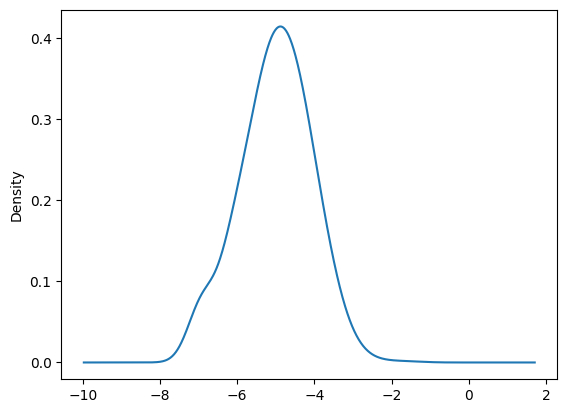

In [20]:
s = np.log(data_mutated['Mutation ratio'])
s.plot.kde(bw_method=0.4)

In [58]:
mu = np.exp(s.mean())
mu

0.006713768391766654

In [32]:
data_filtered = data_mutated[data_mutated['Mutation ratio']>=np.exp(s.mean())]
data_filtered.shape[0]/data_all.shape[0]

0.5164854623366505

In [45]:
thr = data_mutated['Mutation ratio'].quantile(0.8)
data_quant = data_mutated[data_mutated['Mutation ratio']>=thr]
print('Percent of harmful SNV:', np.round(data_quant.shape[0]/data_all.shape[0]*100))
print('-'*40)
print('Coeff for mutations:', )

Percent of harmful SNV: 19.0
----------------------------------------
Coeff for mutations:


<Axes: ylabel='Density'>

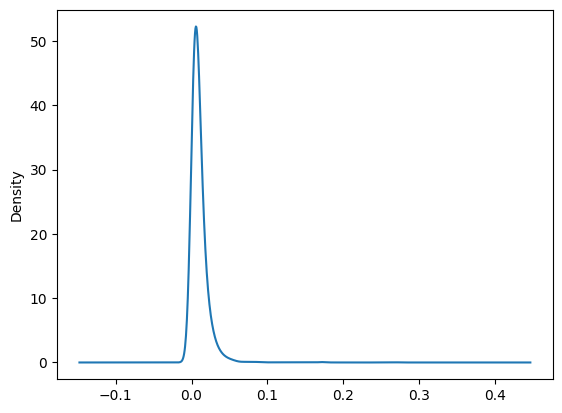

In [22]:
s1 = data_mutated['Mutation ratio']
s1.plot.kde(bw_method=0.4)